# Loups vs ours vs rien

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder("data", valid_pct=0.2, ds_tfms=tfms, size =224) # adding the "size" is necessary
# we're having fastai consider that the images are 224*224 squares : it's necessary for GPU processing
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (426 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
loups,loups,loups,loups,loups
Path: data;

Valid: LabelList (106 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
loups,ours,loups,loups,ours
Path: data;

Test: None

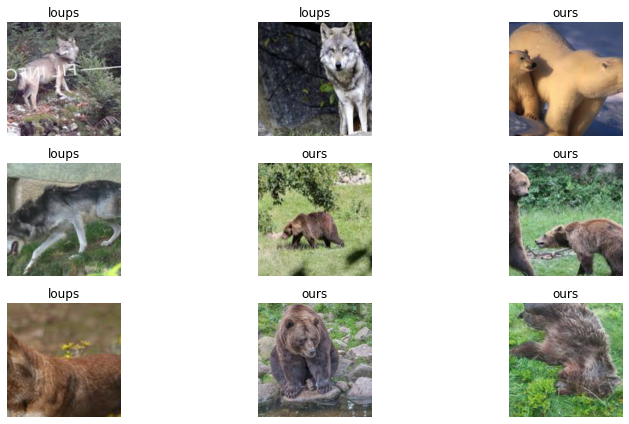

In [4]:
data.show_batch(rows=3, figsize=(12,6))

In [8]:
lrnr = create_cnn(data, models.resnet18, metrics=error_rate)

/Users/guillaume/Code/MSP1_BEARS_AND_WOLVES/venv/lib/python3.7/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/guillaume/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [9]:
lrnr.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.605636,0.248292,0.066038,02:15
1,0.405357,0.207759,0.075472,02:30


In [10]:
lrnr.save("weights-01")

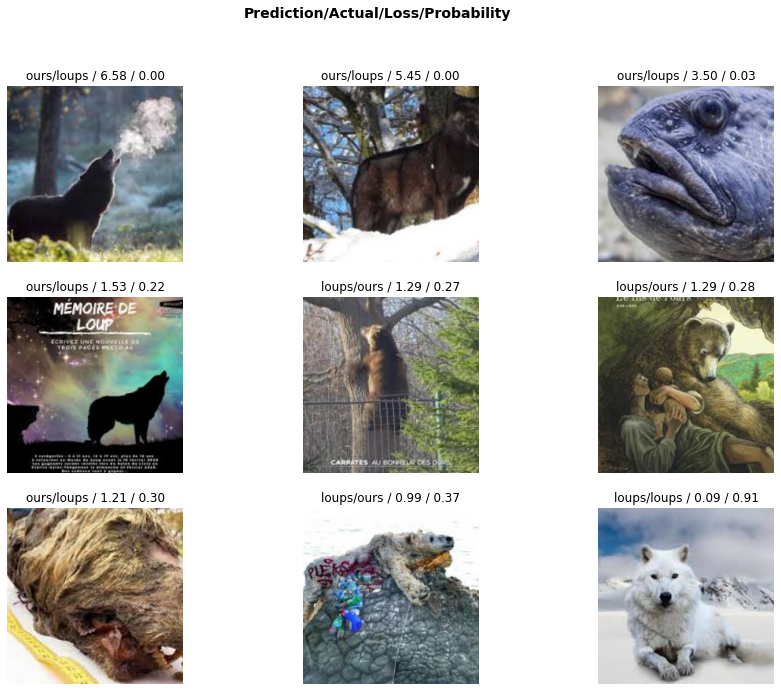

In [11]:
interp = ClassificationInterpretation.from_learner(lrnr)
interp.plot_top_losses(9, figsize=(15, 11))

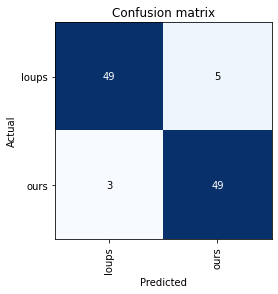

In [14]:
interp.plot_confusion_matrix(figsize=(4,4))

## Etape 1, remarques :

- Beaucoup d'images inappropriées dans le jeu scrappé
- Le modèle tourne, même entraîné douloureusement sur MacBook (CPU)
- Il va désormais falloir rajouter une classe "autre / forêt". Se renseigner sur comment faire. Idéalement, ce sera fait avec des images prises par les appareils photo du refuge.